In [1]:
import numba
import sys
sys.path.insert(0, '../../python_lib')
import networkx as nx
import numpy as np
import graph_gen
import model
import random
from collections import defaultdict
import torch
import math
import solvers
import imp

In [2]:
%matplotlib inline

In [3]:
from save_data import load_pickle_zip
model_ = load_pickle_zip("../models/models/tree.pkl")
res_ex = load_pickle_zip("../models/solutions/tree.pkl")

In [9]:
betas = res_ex["betas"]

In [5]:
import solvers
imp.reload(solvers)

res_nn = solvers.nn_sol(model_, betas, max_step=10000, bias = True, 
                        z2 = False, x_hat_clip = False)
res_nn["name"]="nn"

fe: -693147.186 std_fe: 2.00E-01 M: 0.008 S: 0.693 E: 0.003M: 0.0324, B1 = -0.000018
fe: -6.978 std_fe: 1.01E-05 M: 0.005 S: 0.688 E: -0.094: 0.0256, B1 = 0.0000
fe: -3.558 std_fe: 9.30E-06 M: 0.006 S: 0.675 E: -0.183: 0.0301, B1 = -0.000
fe: -2.448 std_fe: 9.44E-06 M: 0.007 S: 0.654 E: -0.270: 0.0215, B1 = 0.0000
fe: -1.915 std_fe: 9.50E-06 M: 0.015 S: 0.623 E: -0.356: 0.0261, B1 = 0.0000
fe: -1.611 std_fe: 9.86E-06 M: 0.010 S: 0.590 E: -0.431: 0.0325, B1 = 0.0000
fe: -1.420 std_fe: 9.59E-06 M: 0.008 S: 0.553 E: -0.499: 0.0424, B1 = 0.0000
fe: -1.293 std_fe: 1.02E-05 M: 0.009 S: 0.510 E: -0.565: 0.0203, B1 = 0.0000
fe: -1.206 std_fe: 1.00E-05 M: 0.005 S: 0.469 E: -0.620: 0.0492, B1 = 0.0000
fe: -1.143 std_fe: 1.01E-05 M: 0.008 S: 0.427 E: -0.669: 0.0648, B1 = 0.0000
fe: -1.098 std_fe: 9.98E-06 M: 0.009 S: 0.390 E: -0.708: 0.018, B1 = 0.00000
fe: -1.065 std_fe: 1.00E-05 M: 0.005 S: 0.351 E: -0.746: 0.0528, B1 = 0.00000
fe: -1.039 std_fe: 9.94E-06 M: 0.008 S: 0.313 E: -0.779: 0.0224, B1

In [10]:
res_nn_z2 = solvers.nn_sol(model_, betas, max_step=10000,
                           bias = True, z2 = True, x_hat_clip = False)
res_nn_z2["name"]="nn_z2"

fe: -693147.188 std_fe: 1.97E-01 M: 0.008 S: 0.693 E: 0.001 M: 0.0299, B1 = -0.00086
fe: -6.978 std_fe: 1.04E-05 M: 0.010 S: 0.688 E: -0.093: 0.0277, B1 = -0.002
fe: -3.558 std_fe: 1.02E-05 M: 0.006 S: 0.674 E: -0.187: 0.0361, B1 = 0.002
fe: -2.448 std_fe: 9.85E-06 M: 0.008 S: 0.653 E: -0.272: 0.0232, B1 = 0.008
fe: -1.915 std_fe: 1.09E-05 M: 0.007 S: 0.625 E: -0.353: 0.024, B1 = 0.0088
fe: -1.611 std_fe: 9.91E-06 M: 0.007 S: 0.589 E: -0.433: 0.0188, B1 = 0.069
fe: -1.420 std_fe: 1.02E-05 M: 0.010 S: 0.553 E: -0.499: 0.0252, B1 = 0.0311
fe: -1.293 std_fe: 9.73E-06 M: 0.010 S: 0.510 E: -0.565: 0.0159, B1 = 0.061
fe: -1.206 std_fe: 1.02E-05 M: 0.009 S: 0.472 E: -0.616: 0.0247, B1 = 0.0048
fe: -1.143 std_fe: 9.90E-06 M: 0.009 S: 0.427 E: -0.669: 0.0396, B1 = 0.0455
fe: -1.098 std_fe: 1.01E-05 M: 0.005 S: 0.385 E: -0.713: 0.0321, B1 = -0.1301
fe: -1.065 std_fe: 1.09E-05 M: 0.007 S: 0.348 E: -0.748: 0.0141, B1 = 0.0637
fe: -1.039 std_fe: 1.03E-05 M: 0.002 S: 0.311 E: -0.780: 0.0256, B1 = -0

In [11]:
res_nn_is = solvers.nn_sol(model_, betas, max_step=10000,
                           bias = True, z2 = False, 
                           x_hat_clip = False, i_sampling=True)
res_nn_is["name"]="nn_is"

fe: -693147.184 std_fe: 1.57E-04 M: 0.012 S: 0.693 E: -0.004M: 0.0221, B1 = 0.000003
fe: -6.978 std_fe: 1.07E-08 M: 0.010 S: 0.688 E: -0.095: 0.0331, B1 = 0.0000
fe: -3.558 std_fe: 1.05E-08 M: 0.010 S: 0.675 E: -0.183: 0.0147, B1 = 0.0000
fe: -2.448 std_fe: 1.08E-08 M: 0.008 S: 0.652 E: -0.274: 0.0216, B1 = 0.0000
fe: -1.915 std_fe: 1.13E-08 M: 0.010 S: 0.625 E: -0.351: 0.0281, B1 = -0.000
fe: -1.611 std_fe: 1.15E-08 M: 0.006 S: 0.590 E: -0.431: 0.0196, B1 = -0.000
fe: -1.420 std_fe: 1.22E-08 M: 0.009 S: 0.550 E: -0.503: 0.0215, B1 = -0.000
fe: -1.293 std_fe: 1.35E-08 M: 0.008 S: 0.511 E: -0.564: 0.0323, B1 = -0.000
fe: -1.206 std_fe: 1.36E-08 M: 0.006 S: 0.469 E: -0.620: 0.0284, B1 = 0.0000
fe: -1.143 std_fe: 1.50E-08 M: 0.008 S: 0.429 E: -0.667: 0.0289, B1 = -0.000
fe: -1.098 std_fe: 1.61E-08 M: 0.005 S: 0.388 E: -0.710: 0.0355, B1 = 0.00000
fe: -1.065 std_fe: 1.69E-08 M: 0.006 S: 0.352 E: -0.744: 0.0208, B1 = 0.00000
fe: -1.039 std_fe: 1.70E-08 M: 0.006 S: 0.316 E: -0.776: 0.0187, B

In [12]:
import bp_solver
imp.reload(bp_solver)
import solvers
imp.reload(solvers)
res_bp = solvers.bp_sol(model_, betas, val_rand=0.1)
res_bp["name"]="bp"

fe: -693147.181, ener: -0.000, M: 0.000, iter 3
fe: -6.978, ener: -0.093, M: 0.000, iter 5
fe: -3.558, ener: -0.184, M: 0.000, iter 5
fe: -2.448, ener: -0.272, M: 0.000, iter 5
fe: -1.915, ener: -0.355, M: 0.000, iter 5
fe: -1.611, ener: -0.431, M: 0.000, iter 5
fe: -1.420, ener: -0.501, M: 0.000, iter 5
fe: -1.293, ener: -0.564, M: 0.000, iter 5
fe: -1.206, ener: -0.620, M: 0.000, iter 5
fe: -1.143, ener: -0.669, M: 0.000, iter 5
fe: -1.098, ener: -0.711, M: 0.000, iter 5
fe: -1.065, ener: -0.747, M: 0.000, iter 5
fe: -1.039, ener: -0.778, M: 0.000, iter 5
fe: -1.020, ener: -0.804, M: 0.000, iter 5
fe: -1.006, ener: -0.826, M: 0.000, iter 5
fe: -0.994, ener: -0.845, M: 0.000, iter 5
fe: -0.986, ener: -0.860, M: 0.000, iter 5
fe: -0.979, ener: -0.873, M: 0.000, iter 5
fe: -0.973, ener: -0.884, M: 0.000, iter 5
fe: -0.969, ener: -0.892, M: 0.000, iter 5


In [15]:
from save_data import save_pickle_zip
name_file="tree"
file_path = "./results/"+name_file + ".pkl"
all_res = {
    "nn":res_nn,
    "nn_is": res_nn_is,
    "nn_z2":res_nn_z2,
    "bp":res_bp
}
save_pickle_zip(file_path, all_res)

# results

In [16]:
from save_data import load_pickle_zip
all_res = load_pickle_zip(file_path)
res_nn = all_res["nn"]
res_nn_z2 = all_res["nn_z2"]
res_nn_is = all_res["nn_is"]
res_bp = all_res["bp"]

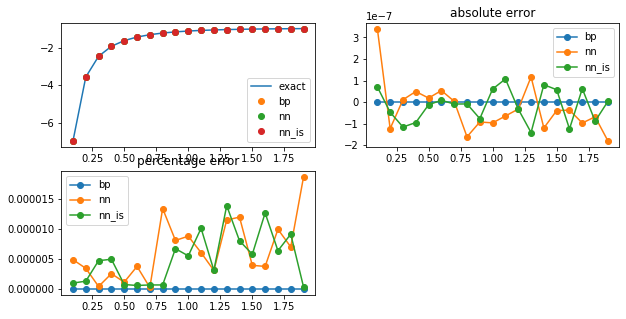

In [17]:
%matplotlib inline
import imp
imp.reload(solvers)
label="fe"
plt= solvers.plot_quantity(label, res_ex, [res_bp, res_nn, res_nn_is], init_=1)
#plt.ylim(-0.001,0.11)
plt.show()

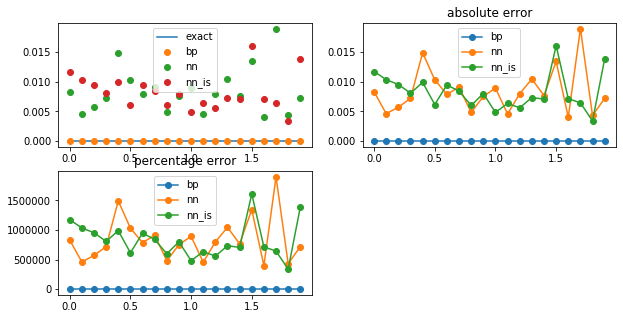

In [18]:
%matplotlib inline
label="M"
plt= solvers.plot_quantity(label, res_ex, [res_bp, res_nn, res_nn_is])
plt.show()

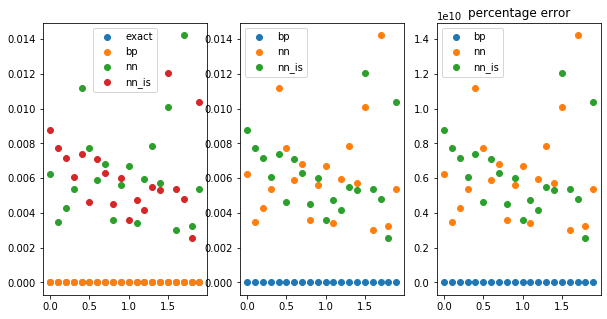

In [19]:
%matplotlib inline
label="M_i"
plt= solvers.plot_quantity_sum(label, res_ex, [res_bp, res_nn, res_nn_is], init_=0)
plt.show()

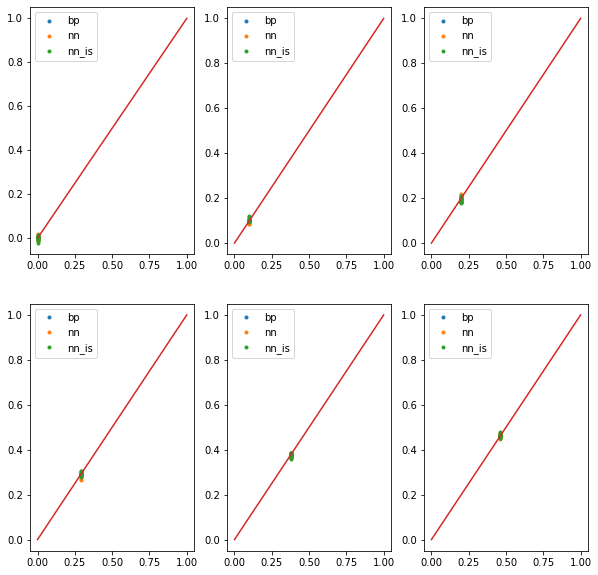

In [27]:
import solvers
imp.reload(solvers)
plt = solvers.plot_all_corr(betas[0:6], res_ex, [res_bp, res_nn, res_nn_is], model_.J_interaction)
plt.show()

# Images

<function matplotlib.pyplot.show(*args, **kw)>

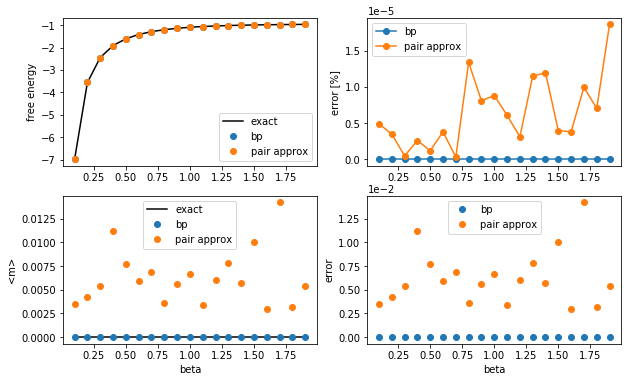

In [59]:
import matplotlib.pyplot as plt
init_ =1
name_file = "tree.pdf"
label="fe"

others = [res_bp, res_nn]
res_nn["name"] = "pair approx"
plt.figure(figsize=(10,6))
ax1 = plt.subplot(221,)
ax1.set_ylabel("free energy")
plt.plot(res_ex["betas"][init_:], res_ex[label][init_:], label = "exact",
         color="black")
ax1.set_ylabel("free energy")

for other in others:
    plt.plot(other["betas"][init_:], other[label][init_:],"o", label=other["name"],)
plt.legend()
ax3 = plt.subplot(222)
for other in others:
    plt.plot(other["betas"][init_:], 100 * abs(other[label][init_:] - res_ex[label][init_:]) / abs(res_ex[label][init_:] +1e-10), "-o",
             label=other["name"])
plt.ticklabel_format(axis='y', style='sci', scilimits=(-4,4))

ax3.set_ylabel("error [%]")
plt.legend()

label="M_i"

others = [res_bp, res_nn]

res_nn["name"] = "pair approx"

ax4 = plt.subplot(223,)
ax4.set_ylabel("<m>")
ax4.set_xlabel("beta")

ax4.plot(res_ex["betas"][init_:], abs(res_ex[label][init_:]).sum(axis=1)/len(res_ex[label]),
             label="exact", color="black")
for other in others:
    ax4.plot(other["betas"][init_:], abs(other[label][init_:]).sum(axis=1)/len(other[label]), "o",
             label=other["name"])
plt.legend()

ax2 = plt.subplot(224)

for other in others:
    ax2.plot(other["betas"][init_:], abs(abs(other[label][init_:]) - abs(res_ex[label][init_:])).sum(axis=1)/len(other[label]), "o",
             label=other["name"])
ax2.legend()
plt.ticklabel_format(axis='y', style='sci', scilimits=(-1,4))

ax2.set_xlabel("beta")
ax2.set_ylabel("error")
plt.legend()
plt.savefig("./img/" + name_file)
plt.show